In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.utils import plot_model
%matplotlib inline

In [5]:
train = pd.read_csv('C:\\Users\\Incorta\\Desktop\\number_ded\\mnist_train.csv')
test = pd.read_csv('C:\\Users\\Incorta\\Desktop\\number_ded\\mnist_test.csv')

In [6]:
print('the shape of train {}'.format(train.shape))
print('the shape of test {}'.format(test.shape))

the shape of train (59999, 785)
the shape of test (9999, 785)


In [7]:
train

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x_train = train.drop('5',axis=1).values
y_train = train['5'].values



x_test = test.drop('7',axis=1).values
y_test = test['7'].values

In [10]:
x_train,x_test = x_train.reshape(-1,28*28),x_test.reshape(-1,28*28)

# Normalization
x_train,x_test = x_train/255,x_test/255


y_train,y_test = tf.one_hot(y_train,10),tf.one_hot(y_test,10)

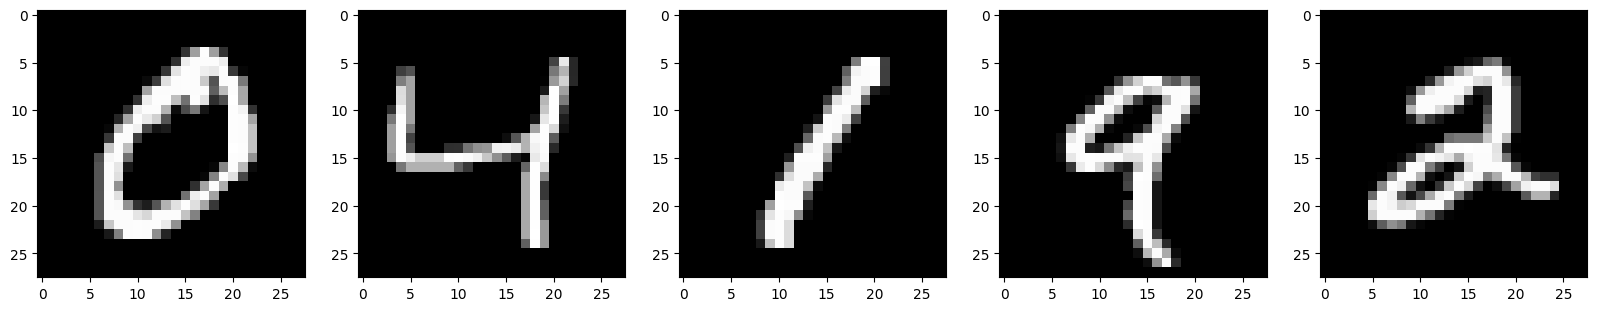

In [11]:
plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i].reshape(28,28),cmap='gray')
plt.show()

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[784]),
    tf.keras.layers.Dense(128,activation ='relu'),
    tf.keras.layers.Dense(10,activation ='softmax')
])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',loss='CategoricalCrossentropy',metrics=['CategoricalAccuracy'])

In [15]:
history=model.fit(x=x_train,y=y_train,batch_size=32,
                  epochs=20,
                  callbacks=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_categorical_accuracy',restore_best_weights=True, mode='max'),
                 validation_split=0.1)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - CategoricalAccuracy: 0.9217 - loss: 0.2744 - val_CategoricalAccuracy: 0.9655 - val_loss: 0.1226
Epoch 2/20
  72/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - CategoricalAccuracy: 0.9610 - loss: 0.1423

c:\Users\Incorta\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\callbacks\early_stopping.py:99: UserWarning: Early stopping conditioned on metric `val_categorical_accuracy` which is not available. Available metrics are: CategoricalAccuracy,loss,val_CategoricalAccuracy,val_loss
  current = self.get_monitor_value(logs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - CategoricalAccuracy: 0.9651 - loss: 0.1192 - val_CategoricalAccuracy: 0.9715 - val_loss: 0.1017
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - CategoricalAccuracy: 0.9754 - loss: 0.0824 - val_CategoricalAccuracy: 0.9760 - val_loss: 0.0841
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - CategoricalAccuracy: 0.9811 - loss: 0.0615 - val_CategoricalAccuracy: 0.9777 - val_loss: 0.0762
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - CategoricalAccuracy: 0.9864 - loss: 0.0469 - val_CategoricalAccuracy: 0.9793 - val_loss: 0.0721
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - CategoricalAccuracy: 0.9885 - loss: 0.0371 - val_CategoricalAccuracy: 0.9772 - val_loss: 0.0707
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - CategoricalAccuracy: 0.9905 - loss: 0.0295 - val_CategoricalAccuracy: 0.9770 - val_loss: 0.0811
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - CategoricalAccuracy: 0.9924 - loss: 0.0244 